### 데이터 불러오기

In [21]:
pip install seaborn

     -------------------------------------- 293.3/293.3 KB 6.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\LG\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
import pandas as pd

In [6]:
pd.options.display.max_colwidth = 150

df = pd.read_csv('./data/un-general-debates-blueprint.csv.gz')
df.sample(2, random_state=53)

,session,year,country,country_name,speaker,position,text
3871,51,1996,PER,Peru,Francisco Tudela Van Breughel Douglas,Minister for Foreign Affairs,"﻿At the outset, allow me,\nSir, to convey to you and to this Assembly the greetings\nand congratulations of the Peruvian people, as well as\ntheir..."
4697,56,2001,GBR,United Kingdom,Jack Straw,Minister for Foreign Affairs,"﻿Please allow me\nwarmly to congratulate you, Sir, on your assumption of\nthe presidency of the fifty-sixth session of the General\nAssembly.\nThi..."


### 열에 대한 통계 계산

In [7]:
df['length'] = df['text'].str.len()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
session,7507.0,49.610763,12.892155,25.0,39.0,51.0,61.0,70.0
year,7507.0,1994.610763,12.892155,1970.0,1984.0,1996.0,2006.0,2015.0
length,7507.0,17967.281604,7860.038463,2362.0,12077.0,16424.0,22479.5,72041.0


In [9]:
# 숫자가 아닌 열의 요약 : include = '0'
# '0'은 np.object의 별칭임
df[['country', 'speaker']].describe(include='O').T

,count,unique,top,freq
country,7507,199,ALB,46
speaker,7480,5428,Seyoum Mesfin,12


### 누락된 데이터 확인

In [10]:
df.isna().sum()

session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
length             0
dtype: int64

In [11]:
df['speaker'].fillna('unknown', inplace=True)

In [15]:
# 발표자 열에 Bush가 들어있는 레코드 수 계산하기
df[df['speaker'].str.contains('Bush')]['speaker'].value_counts()

speaker
George W. Bush        4
Mr. George W. Bush    2
Bush                  1
George Bush           1
Mr. George W Bush     1
Name: count, dtype: int64

### 값 분포 시각화

<Axes: >

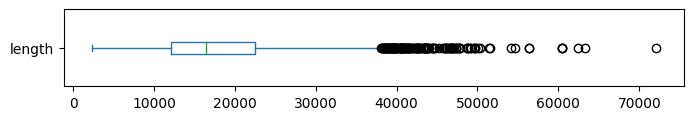

In [17]:
# 박스플롯
# vert=False : 그래프를 수평으로 배치
df['length'].plot(kind='box', vert=False, figsize=(8, 1))

<Axes: ylabel='Frequency'>

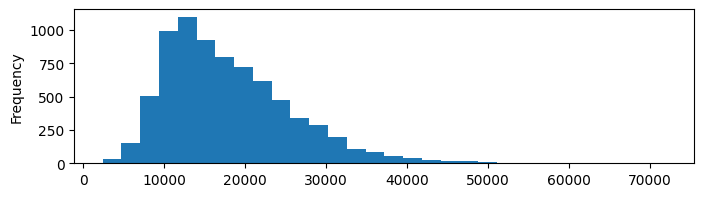

In [19]:
# 히스토그램
df['length'].plot(kind='hist', bins=30, figsize=(8,2))

<Figure size 800x200 with 0 Axes>

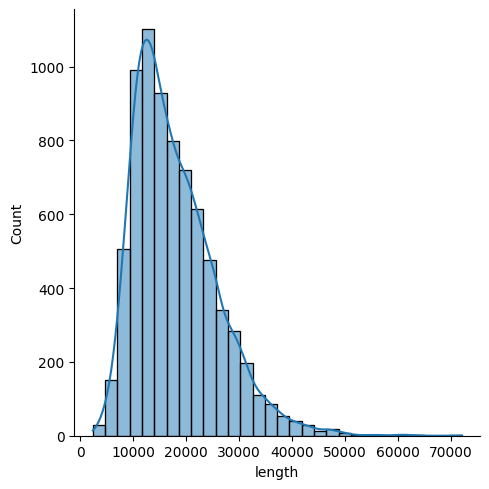

In [27]:
# Not in book: seaborn plot with gaussian kernel density estimate
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,2))
sns.displot(df['length'], bins=30, kde=True)
plt.show()

### 범주 간의 값 분포 비교

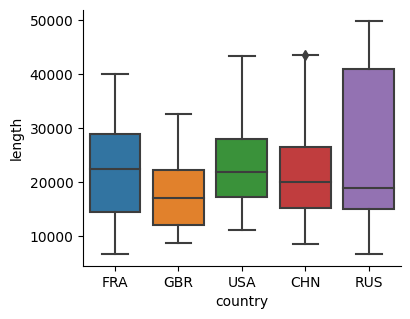

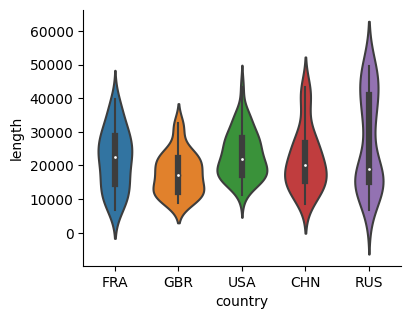

In [39]:
# 각 상임이사국의 연설 길이 분포 시각화
import seaborn as sns

where = df['country'].isin(['USA', 'FRA', 'GBR', 'CHN', 'RUS'])
g = sns.catplot(data = df[where], x='country', y='length', kind='box')
g.fig.set_size_inches(4, 3)
g.fig.set_dpi(100)
g = sns.catplot(data=df[where], x='country', y='length', kind='violin')
g.fig.set_size_inches(4, 3)
g.fig.set_dpi(100)

### 시간 경과에 따른 변화 시각화

<Axes: title={'center': 'Number of Countries'}, xlabel='year'>

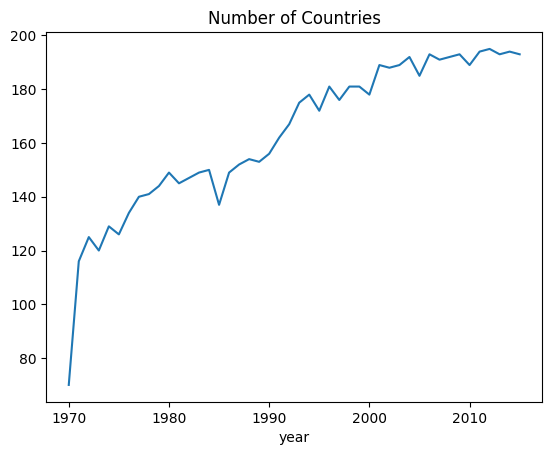

In [42]:
# size() : 그룹화
df.groupby('year').size().plot(title='Number of Countries')

<Axes: title={'center': 'Avg. Speech Length'}, xlabel='year'>

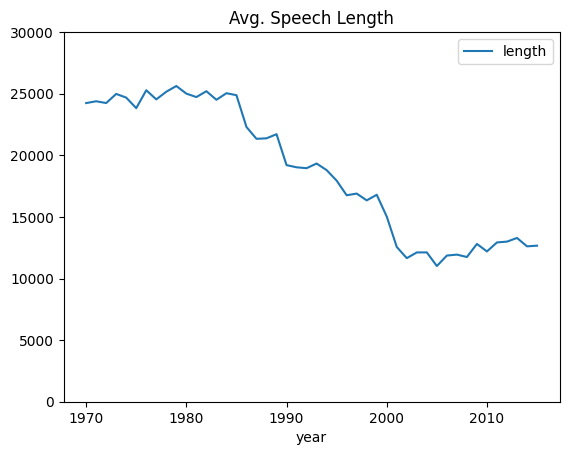

In [44]:
df.groupby('year').agg({'length':'mean'}) \
.plot(title='Avg. Speech Length', ylim=(0,30000))